In [80]:
import mnist
import numpy as np
import scipy.ndimage

## Load in mnist, and pick one picture

In [81]:
train_mnist = mnist.train_images()
train_mnist_labels = mnist.train_labels()
pick_index = 90

picked_picture = train_mnist[pick_index]

print('picked_picture has label', train_mnist_labels[pick_index])


picked_picture has label 6


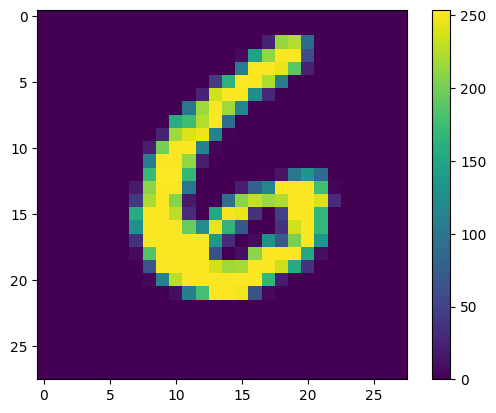

In [82]:
import matplotlib.pyplot as plt

plt.imshow(picked_picture) 
plt.colorbar() 
plt.show()

## Rotate images and store them in an array

In [83]:
def get_rotations(img, rotation_steps):
    for rot in rotation_steps:
        img_ = scipy.ndimage.rotate(img, rot, reshape=False) # newly modified
        yield img_ # newly modified

In [84]:
rotation_steps = np.linspace(-30, 30, 50)
train_rotations = []

for idx, rotation in enumerate(get_rotations(picked_picture, rotation_steps)):
    train_rotations.append(rotation)

train_rotations = np.array(train_rotations)

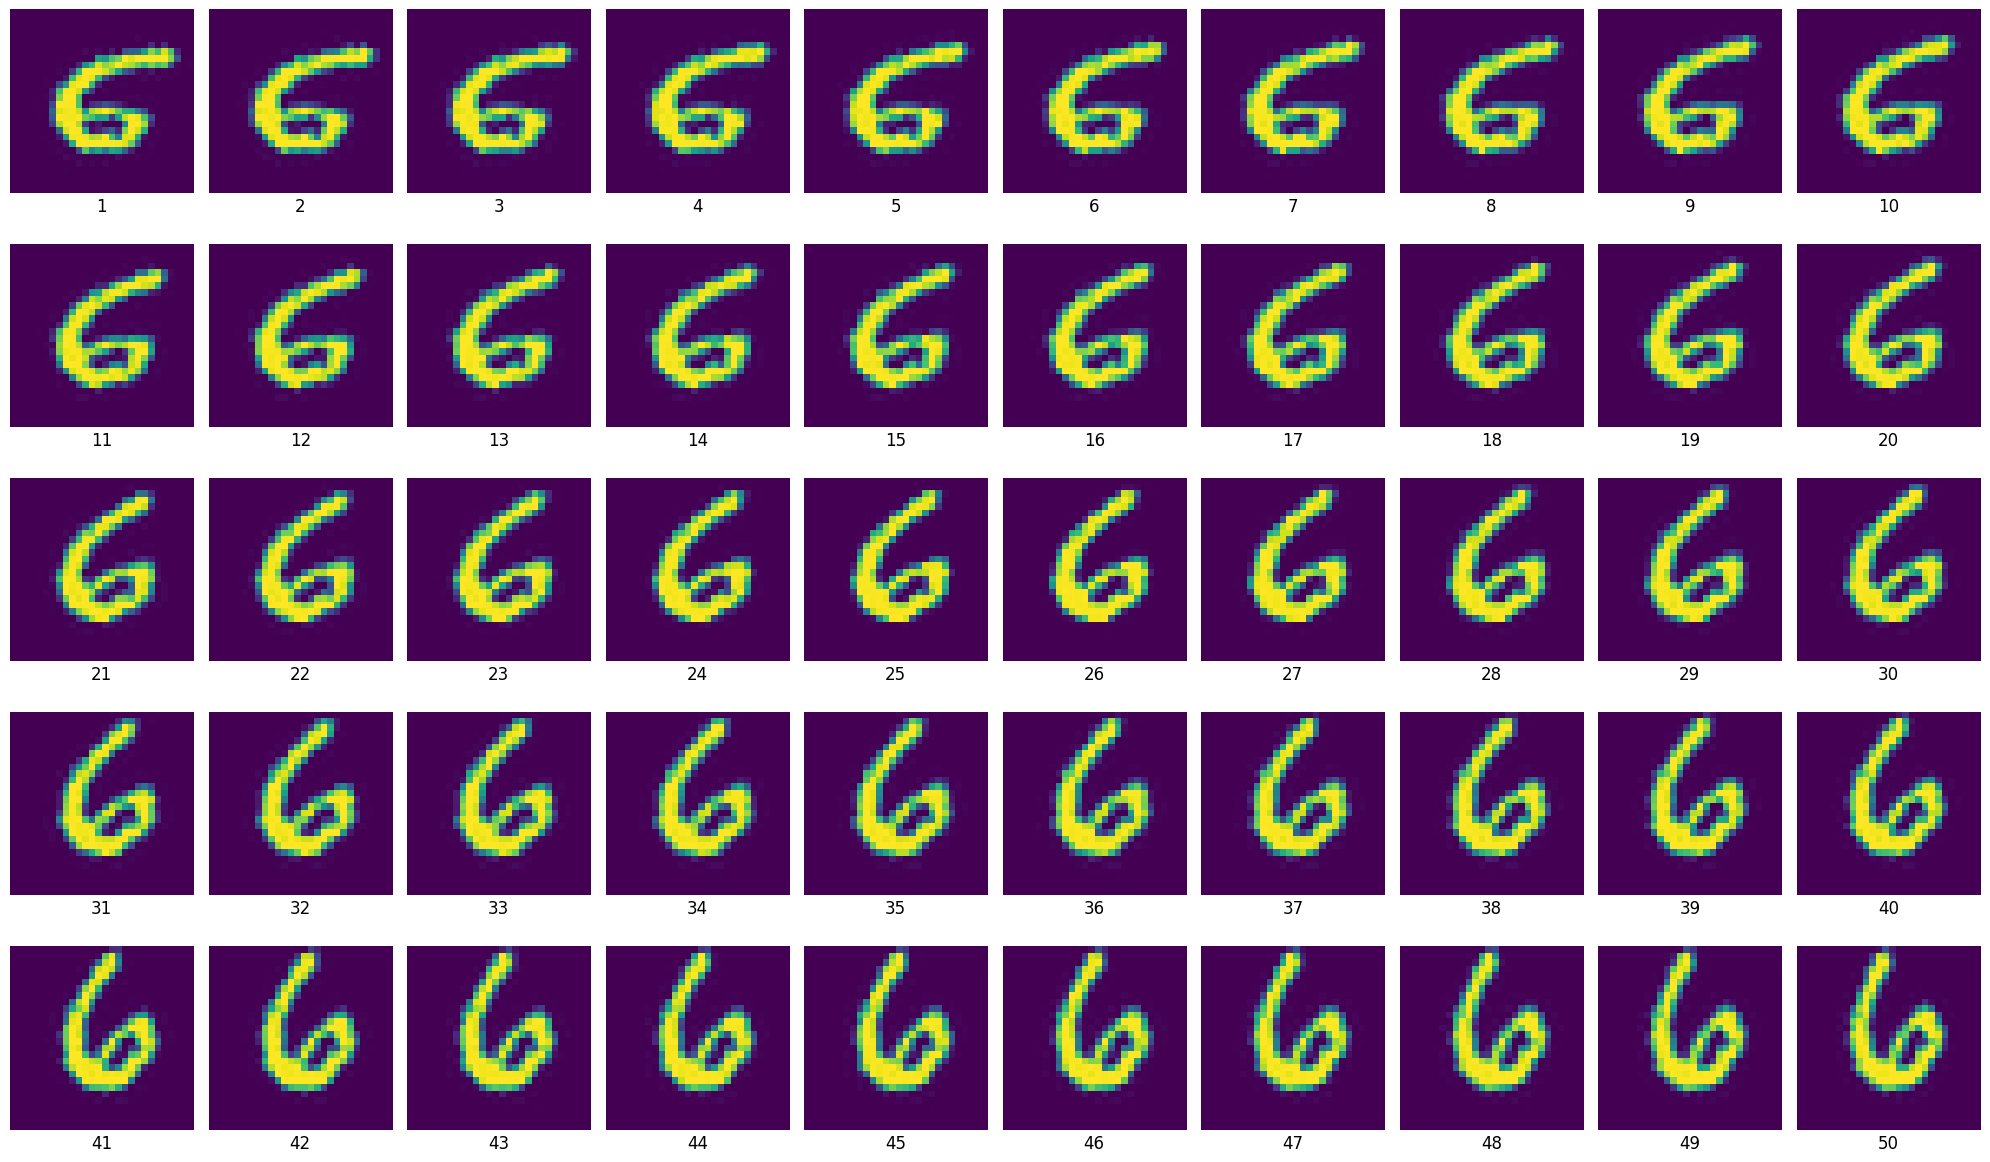

In [85]:
import math
num_images = rotation_steps.shape[0]
images_per_row = 10

num_rows = math.ceil(num_images / images_per_row)
fig = plt.figure(figsize=(20, 12))

for i, image in enumerate(train_rotations):
    row = i // images_per_row
    col = i % images_per_row

    ax = fig.add_subplot(num_rows, images_per_row, i + 1)
    ax.imshow(image)
    ax.axis('off') 
    ax.text(0.5, -0.1, f"{i+1}", size=12, ha="center", transform=ax.transAxes)

plt.tight_layout() 
plt.show()

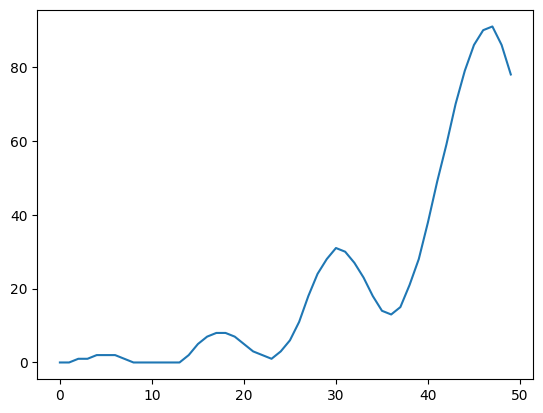

In [86]:
x_indx = 13
y_indx = 22
plt.plot(train_rotations[:, x_indx, y_indx])

In [87]:
import matplotlib.pyplot as plt
import numpy as np

# Creating a figure with 28x28 subplots
fig, axs = plt.subplots(28, 28, figsize=(15, 15))

# Adjusting the layout
plt.subplots_adjust(hspace=0.5, wspace=0.5)

# Looping through each subplot and plotting the corresponding time series
for x in range(28):
    for y in range(28):
        axs[x, y].plot(train_rotations[:, x, y])
        axs[x, y].set_xticks([])
        axs[x, y].set_yticks([])

# Show the plot
plt.show()
